Klasifikasi Perumahan Surabaya dengan Menggunakan Algoritma Naive Bayes

In [1266]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score

In [1245]:
# read csv file perumahan_surabaya
df = pd.read_csv('data_per_surabaya.csv')
df.head()

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Jumlah Lantai,Price,Label
0,2,1,50,91,1,600000000,Low
1,2,1,67,67,2,600000000,Low
2,2,1,91,50,1,600000000,Low
3,7,1,91,91,1,600000000,Low
4,2,1,60,60,1,650000000,Low


In [1268]:
x_true = df.iloc[:,:6].values
y_true = df.iloc[:,6].values #data target

In [1247]:
x_true

array([[         2,          1,         50,         91,          1,
         600000000],
       [         2,          1,         67,         67,          2,
         600000000],
       [         2,          1,         91,         50,          1,
         600000000],
       ...,
       [         3,          2,        119,        112,          2,
        3250000000],
       [         3,          1,        119,        112,          2,
        3250000000],
       [         3,          1,        119,        112,          2,
        3250000000]], dtype=int64)

In [1248]:
y_true

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low',

Membuat Model & Training

In [1250]:
model = GaussianNB()

Cross Validation

In [1252]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=3)

Testing Model

In [1254]:
y_predict = cross_val_predict(model, x,y, cv=cv)
y_predict

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low',

Evaluasi Model

Tingkat Akurasi: 99 persen
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       206
      Medium       0.99      1.00      0.99       196
        High       1.00      0.99      0.99       167

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



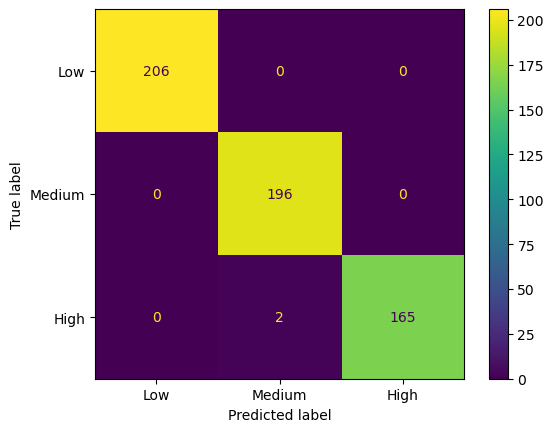

In [1256]:
labels = ['Low', 'Medium', 'High']
akurasi = accuracy_score(y_true,y_predict)
print('Tingkat Akurasi: %d persen'%(akurasi*100))
print(metrics.classification_report(y_true,y_predict, labels=labels, target_names=labels))
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, labels=labels)